In [1]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D3: Additional queries that can be done to further understand June and December

#### Month of June analysis

In [4]:
# query that filters the Measurement table to retrieve the precipitations for the month of june.
june_weather = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

# converting june precipitation to list
june_data = []
for temps, prcp in june_weather:
    june_data.append([temps, prcp])
    
# creating a dataframe from list
june_weather_df = pd.DataFrame(june_data, columns=['Temps', 'Precipitation'])

# resetting index
june_weather_df.reset_index(drop=True, inplace=True)
june_weather_df.head()

,Temps,Precipitation
0,78.0,0.00
1,76.0,0.01
2,78.0,0.00
3,76.0,0.00
4,77.0,0.00


Text(0, 0.5, 'Milimeteres')

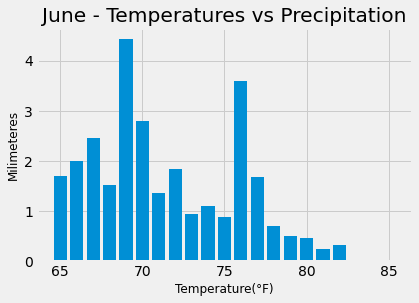

In [5]:
# plotting june weather data for better visualization
plt.bar(june_weather_df['Temps'], june_weather_df['Precipitation'])
plt.title('June - Temperatures vs Precipitation')
plt.xlabel('Temperature(°F)', fontsize=12)
plt.ylabel('Milimeteres', fontsize=12)

#### Month of December analysis

In [6]:
# query that filters the Measurement table to retrieve the precipitations for the month of december.
dec_weather = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

# converting decembeer precipitation to list
dec_data = []
for temps, prcp in dec_weather:
    dec_data.append([temps, prcp])
    
# creating a dataframe from list
dec_weather_df = pd.DataFrame(dec_data, columns=['Temps', 'Precipitation'])

# resetting index
dec_weather_df.reset_index(drop=True, inplace=True)
dec_weather_df.head()

,Temps,Precipitation
0,76.0,0.04
1,74.0,0.00
2,74.0,0.00
3,64.0,0.00
4,64.0,0.00


Text(0, 0.5, 'Milimeteres')

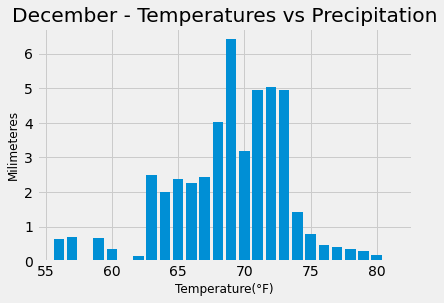

In [7]:
# plotting december weather data for better visualization
plt.bar(dec_weather_df['Temps'], dec_weather_df['Precipitation'])
plt.title('December - Temperatures vs Precipitation')
plt.xlabel('Temperature(°F)', fontsize=12)
plt.ylabel('Milimeteres', fontsize=12)